# Farid Nejabat (12306323)
## Data Exploration for the MovieLens Datasets
## Experiment Design for Data Science (WS 2023/24)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# , names=['movie_id', 'movie_title', 'release_date', '...', 'genre1', 'genre2', ...]

In [3]:
# Load data
ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
columns_for_movies=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
                            'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                            'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
genras = ['Action','Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
          'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('u.item', sep='|', encoding='latin-1',names=columns_for_movies)
users = pd.read_csv('u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])


In [4]:
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [5]:
movies

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [7]:
movies.columns

Index(['movie_id', 'movie_title', 'release_date', 'video_release_date',
       'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [8]:
movies['movie_title'].count()

1682

In [9]:
# Basic statistics
print(ratings.describe())
print(movies.describe())
print(users.describe())


            user_id        item_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
          movie_id  video_release_date      unknown       Action    Adventure  \
count  1682.000000                 0.0  1682.000000  1682.000000  1682.000000   
mean    841.500000                 NaN     0.001189     0.149227     0.080262   
std     485.695893                 NaN     0.034473     0.356418     0.271779   
min       1.000000                 NaN     0.000000     0.000000     0.000000   
25%     421.250000 

In [10]:
# genre_columns = movies.columns[6:]
# genre_data = movies[genre_columns]
# genre_distribution = genre_data.sum()
# print(genre_distribution)
# plt.figure(figsize=(12, 6))
# genre_distribution.plot(kind='bar', color='skyblue')
# plt.title('Genre Distribution in MovieLens 100K Dataset')
# plt.xlabel('Genre')
# plt.ylabel('Number of Movies')
# plt.xticks(rotation=45, ha='right')
# plt.show()


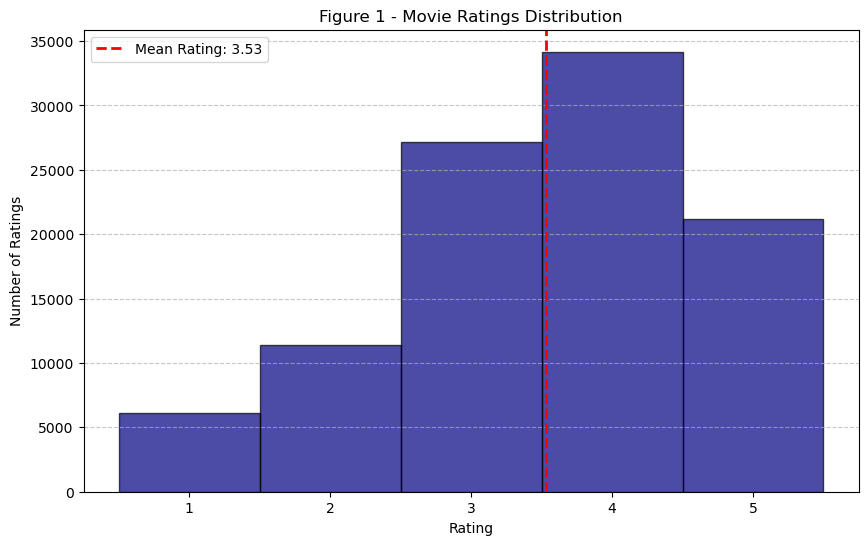

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'ratings' DataFrame is already loaded
# ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Plotting the Ratings Distribution
plt.figure(figsize=(10, 6))
plt.hist(ratings['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', color='#000080', alpha=0.7)
plt.title('Figure 1 - Movie Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a vertical line for the mean rating
mean_rating = ratings['rating'].mean()
plt.axvline(mean_rating, color='red', linestyle='dashed', linewidth=2, label=f'Mean Rating: {mean_rating:.2f}')
plt.legend()

# Show the plot
plt.show()


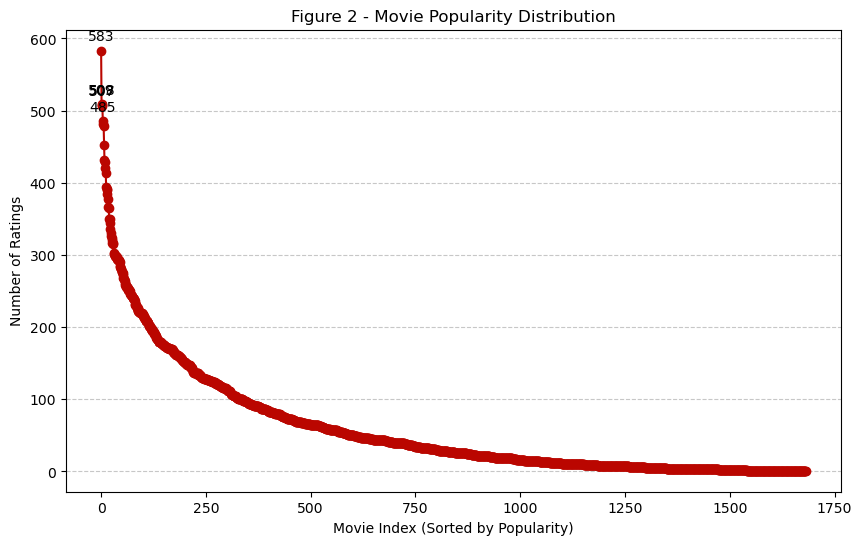

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'ratings' DataFrame is already loaded
# ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Count the number of ratings for each movie
movie_ratings_count = ratings['item_id'].value_counts()

# Plotting the Movie Popularity Distribution
plt.figure(figsize=(10, 6))
plt.plot(movie_ratings_count.values, marker='o', linestyle='-', color='#BA0600')
plt.title('Figure 2 - Movie Popularity Distribution')
plt.xlabel('Movie Index (Sorted by Popularity)')
plt.ylabel('Number of Ratings')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Adding labels for the top 5 most popular movies
# top_movies = movie_ratings_count.head(5)
# for i, count in enumerate(top_movies.values):
#     plt.text(i, count + 10, f'{count}', ha='center', va='bottom')

# Show the plot
plt.show()


In [ ]:
movie_ratings_count

50      583
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: item_id, Length: 1682, dtype: int64

In [ ]:
# import seaborn as sns

# # Assuming 'ratings' DataFrame is already loaded
# # ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# # Calculate the average rating and number of ratings for each movie
# movie_stats = ratings.groupby('item_id')['rating'].agg(['mean', 'count']).reset_index()
# movie_stats.columns = ['item_id', 'average_rating', 'num_ratings']

# # Create a scatter plot with a regression line
# plt.figure(figsize=(10, 6))
# sns.regplot(x='num_ratings', y='average_rating', data=movie_stats, scatter_kws={'s': 20}, line_kws={'color': 'red'})
# plt.title('Correlation between Number of Ratings and Average Rating')
# plt.xlabel('Number of Ratings')
# plt.ylabel('Average Rating')

# # Show the plot
# plt.show()


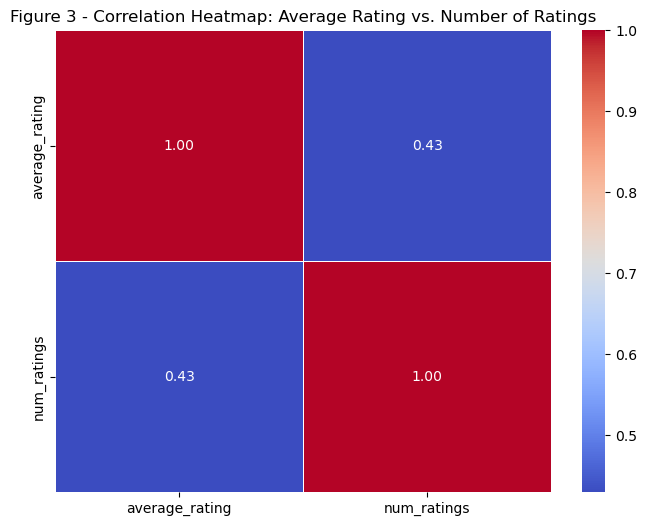

In [ ]:
import seaborn as sns

# Assuming 'ratings' DataFrame is already loaded
# ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

# Calculate the average rating and number of ratings for each movie
movie_stats = ratings.groupby('item_id')['rating'].agg(['mean', 'count']).reset_index()
movie_stats.columns = ['item_id', 'average_rating', 'num_ratings']

# Create a correlation matrix
correlation_matrix = movie_stats[['average_rating', 'num_ratings']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Figure 3 - Correlation Heatmap: Average Rating vs. Number of Ratings')
plt.show()


In [ ]:
# # Load data
# ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
# columns_for_movies=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action',
#                             'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
#                             'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
# genras = ['Action','Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
#           'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
# movies = pd.read_csv('u.item', sep='|', encoding='latin-1',names=columns_for_movies)
# users = pd.read_csv('u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])


Average rating for Action: 3.48
Average rating for Adventure: 3.50
Average rating for Animation: 3.58
Average rating for Children's: 3.35
Average rating for Comedy: 3.39
Average rating for Crime: 3.63
Average rating for Documentary: 3.67
Average rating for Drama: 3.69
Average rating for Fantasy: 3.22
Average rating for Film-Noir: 3.92
Average rating for Horror: 3.29
Average rating for Musical: 3.52
Average rating for Mystery: 3.64
Average rating for Romance: 3.62
Average rating for Sci-Fi: 3.56
Average rating for Thriller: 3.51
Average rating for War: 3.82
Average rating for Western: 3.61


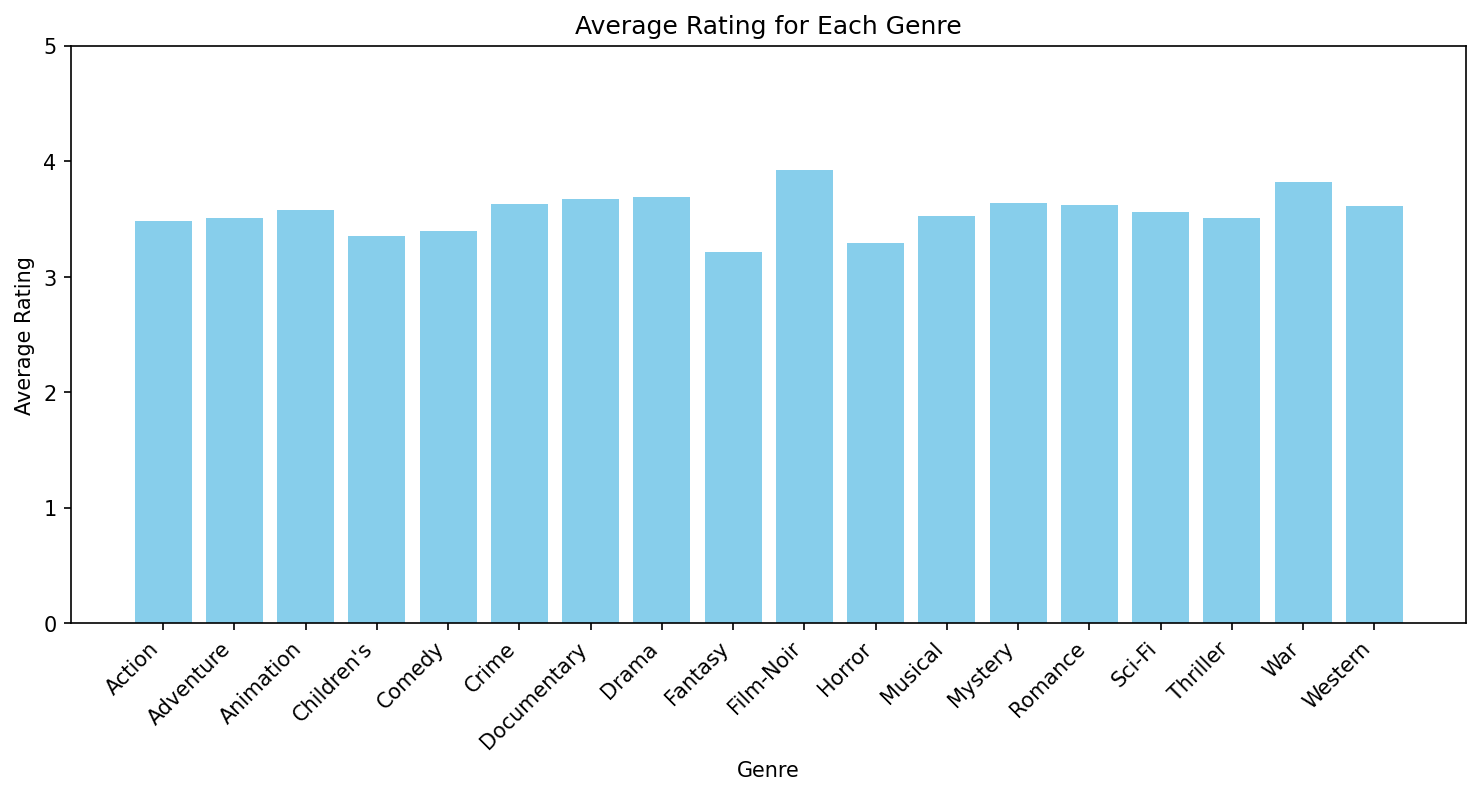

In [ ]:
import pandas as pd

# Assume you have loaded 'movies' and 'ratings' tables from the dataset
# For example:
# movies = pd.read_csv('movies.csv')
# ratings = pd.read_csv('ratings.csv')

# Merge 'movies' and 'ratings' tables on 'movie_id' and 'item_id'
merged_data = pd.merge(ratings, movies, left_on='item_id', right_on='movie_id')
plt.figure(figsize=(12,5), dpi=150)
# Iterate through each genre column and calculate the average rating
genre_columns = columns_for_movies[6:]
average_ratings_by_genre = {}

for genre in genre_columns:
    genre_ratings = merged_data[merged_data[genre] == 1]['rating']
    average_rating = genre_ratings.mean()
    average_ratings_by_genre[genre] = average_rating

# Display or use the results
for genre, avg_rating in average_ratings_by_genre.items():
    print(f"Average rating for {genre}: {avg_rating:.2f}")

# Create a bar plot
plt.bar(average_ratings_by_genre.keys(), average_ratings_by_genre.values(), color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating for Each Genre')
plt.ylim(0, 5)  # Set y-axis range if needed
plt.xticks(rotation=45, ha='right')
plt.show()


/var/folders/7k/97gk_m0s405_sxdn3ww02drw0000gn/T/ipykernel_24864/4094815251.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(genre_distribution.index, rotation=45, ha='right')


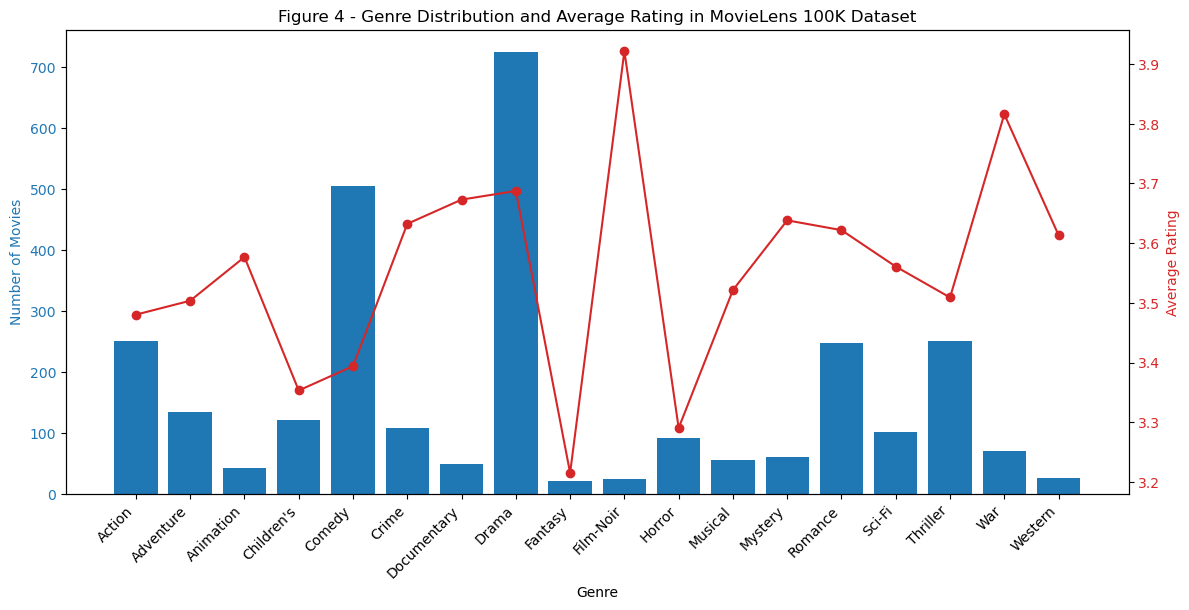

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge 'movies' and 'ratings' tables on 'movie_id' and 'item_id'
merged_data = pd.merge(ratings, movies, left_on='item_id', right_on='movie_id')

# Extract genre columns from 'movies'
genre_columns = movies.columns[6:]
genre_data = movies[genre_columns]

# Calculate genre distribution
genre_distribution = genre_data.sum()

# Iterate through each genre column and calculate the average rating
average_ratings_by_genre = {}

for genre in genre_columns:
    genre_ratings = merged_data[merged_data[genre] == 1]['rating']
    average_rating = genre_ratings.mean()
    average_ratings_by_genre[genre] = average_rating

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for genre distribution
color = 'tab:blue'
ax1.set_xlabel('Genre')
ax1.set_ylabel('Number of Movies', color=color)
ax1.bar(genre_distribution.index, genre_distribution.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(genre_distribution.index, rotation=45, ha='right')

# Twin the axis for two different y-axes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Rating', color=color)
ax2.plot(average_ratings_by_genre.keys(), average_ratings_by_genre.values(), color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Figure 4 - Genre Distribution and Average Rating in MovieLens 100K Dataset')
plt.show()


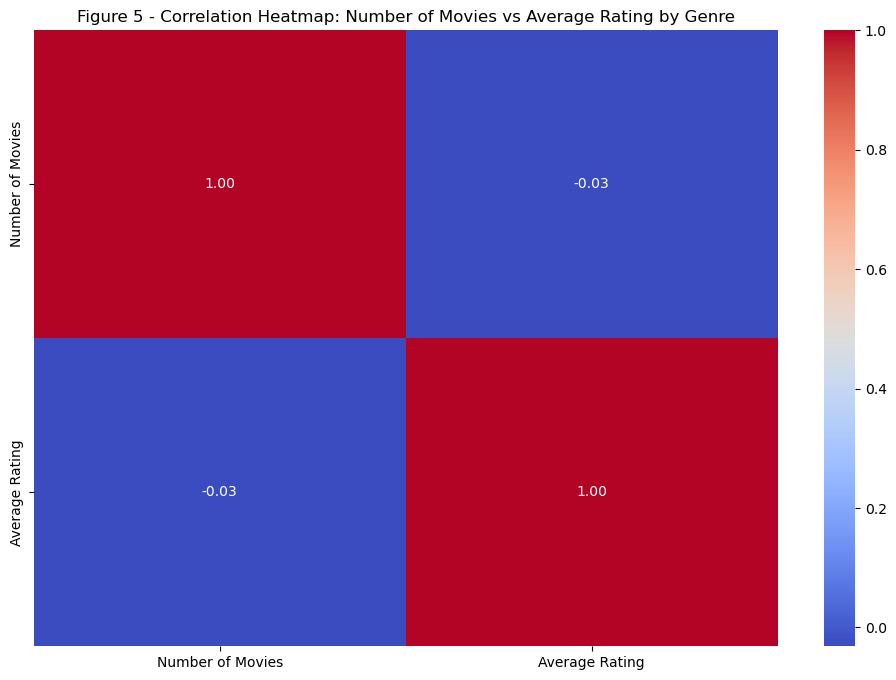

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge 'movies' and 'ratings' tables on 'movie_id' and 'item_id'
merged_data = pd.merge(ratings, movies, left_on='item_id', right_on='movie_id')

# Extract genre columns from 'movies'
genre_columns = movies.columns[6:]
genre_data = movies[genre_columns]

# Calculate genre distribution
genre_distribution = genre_data.sum()

# Iterate through each genre column and calculate the average rating
average_ratings_by_genre = {}

for genre in genre_columns:
    genre_ratings = merged_data[merged_data[genre] == 1]['rating']
    average_rating = genre_ratings.mean()
    average_ratings_by_genre[genre] = average_rating

# Create a DataFrame for the correlation analysis
correlation_data = pd.DataFrame({
    'Number of Movies': genre_distribution,
    'Average Rating': pd.Series(average_ratings_by_genre)
})

# Plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure 5 - Correlation Heatmap: Number of Movies vs Average Rating by Genre')
plt.show()
